# Programming w/🐍 for Data Science 
<img src="https://github.com/habermanUIUC/CodeStories-lessons/blob/main/lessons/p4ds/ds/pandas2/html/section00.png?raw=True" align="left"/>

<a id="install"></a>
## Notebook Preparation for Lesson in 1•2•3 steps:
Each lesson will start with a similar template (given in the course schedule):  
1. **save** to your google drive (copy to drive)<br/><img src="https://github.com/habermanUIUC/CodeStories-lessons/blob/main/assets/images/colab/copy-to-drive.png?raw=True"/>
2. **update** the NET_ID to be your netID (no need to include @illinois.edu)
3. **run** the next cell to install the IDE. <img src="https://github.com/habermanUIUC/CodeStories-lessons/blob/main/assets/images/colab/play-button.png?raw=True"/>

In [ ]:
LESSON_ID = 'p4ds:ds:pandas2'   # keep this as is
NET_ID    = 'jcarde28' # CHANGE_ME to your netID (keep the quotes)

def install_ide(net_id, lesson_id):
  import sys
  if 'codestories' not in sys.modules:
      print('installing modules')
      !pip install git+https://mehaberman@bitbucket.org/mehaberman/codestories.git --upgrade &> install.log
  
  from codestories.cs.CodeStories import CodeStory
  return CodeStory(net_id, lesson_id)

ide = install_ide(NET_ID, LESSON_ID)
print(ide.welcome())

installing modules
Telling the story: Pandas, part 2


# Lesson Pandas, part 2
(hit ▶ to read the first part of the lesson️)

In [ ]:
# run to read the next section
ide.reader.view_section(1)

In [ ]:
import pandas as pd
import LessonUtil as Util
p = Util.path_for_data("data.csv")
df = pd.read_csv(p, skiprows = 1, delimiter=';')
print(df.head(5))

         Date          Merchant        Type  Price   Tax  Total
0  01/02/2017      Bevande Café  Restaurant   4.57  0.41   4.98
1  01/03/2017  Papa Del's Pizza  Restaurant  17.57  1.58  19.15
2  01/04/2017       Radio Maria  Restaurant  56.20  5.06  61.26
3  01/05/2017      Bevande Café  Restaurant   3.56  0.32   3.88
4  01/06/2017     County Market     Grocery  30.15  2.71  32.86


# Grouping

In [ ]:
# run to read the next section
ide.reader.view_section(3)

In [ ]:
grp = df.groupby(['Type'])
print(type(grp))

for key, item in grp:
  print(grp.get_group(key), "\n\n")

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
          Date          Merchant     Type   Price    Tax   Total
17  01/21/2017      Apricot Lane  Apparel   47.51   4.28   51.79
21  01/31/2017  Urban Outfitters  Apparel   31.52   2.84   34.36
29  02/15/2017          Ragstock  Apparel   11.57   1.04   12.61
40  02/28/2017      Apricot Lane  Apparel  148.12  13.33  161.45 


          Date       Merchant     Type  Price   Tax  Total
4   01/06/2017  County Market  Grocery  30.15  2.71  32.86
10  01/12/2017         Meijer  Grocery  26.98  2.43  29.41 


          Date                         Merchant        Type  Price   Tax  Total
0   01/02/2017                     Bevande Café  Restaurant   4.57  0.41   4.98
1   01/03/2017                 Papa Del's Pizza  Restaurant  17.57  1.58  19.15
2   01/04/2017                      Radio Maria  Restaurant  56.20  5.06  61.26
3   01/05/2017                     Bevande Café  Restaurant   3.56  0.32   3.88
5   01/07/2017                 Papa D

In [ ]:
grp.mean()

,Price,Tax,Total
Type,,,
Apparel,59.680000,5.372500,65.05250
Grocery,28.565000,2.570000,31.13500
Restaurant,11.342121,1.020909,12.36303
Technology,78.410000,7.055000,85.46500


In [ ]:
# run to read the next section
ide.reader.view_section(5)

In [ ]:
g_f2 = grp.mean().reset_index()
print(g_f2)
print(g_f2.index)
print(g_f2.columns)

         Type      Price       Tax     Total
0     Apparel  59.680000  5.372500  65.05250
1     Grocery  28.565000  2.570000  31.13500
2  Restaurant  11.342121  1.020909  12.36303
3  Technology  78.410000  7.055000  85.46500
RangeIndex(start=0, stop=4, step=1)
Index(['Type', 'Price', 'Tax', 'Total'], dtype='object')


In [ ]:
# run to read the next section
ide.reader.view_section(7)

In [ ]:
df_mean = df.groupby(['Type']).mean()
print(type(df_mean))
print(df_mean['Price'])

<class 'pandas.core.frame.DataFrame'>
Type
Apparel       59.680000
Grocery       28.565000
Restaurant    11.342121
Technology    78.410000
Name: Price, dtype: float64


In [ ]:
# run to read the next section
ide.reader.view_section(9)

In [ ]:
c = df.groupby(['Type']).size().reset_index(name='count')
more_than_30 = c['count'] > 30 
is_tech      = c['Type'] == 'Technology'
print(c [ more_than_30 | is_tech ])

         Type  count
2  Restaurant     33
3  Technology      2


In [ ]:
# run to read the next section
ide.reader.view_section(11)

# Apply(ing)

In [ ]:
# run to read the next section
ide.reader.view_section(12)

In [ ]:
# dataframes
usd   = df.drop(columns=['Type', 'Date', 'Merchant'])
names = df.drop(columns=['Price', 'Tax', 'Total'])

# series
total = df['Total']

# groupby
grp   = df.groupby(['Type'])

print(type(usd), type(total), type(grp))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'> <class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [ ]:
# run to read the next section
ide.reader.view_section(14)

In [ ]:
def together(row):
  m_type = row[0] # row['Type'] will work too
  merc   = row[1] # row['Merchant']
  
  name = m_type[0:5] + ':' + merc[0:5]

  # convert to title case
  return name.title()

df['abbr'] = df[['Type','Merchant']].apply(together, axis=1)
print(df['abbr'])

0     Resta:Bevan
1     Resta:Papa 
2     Resta:Radio
3     Resta:Bevan
4     Groce:Count
5     Resta:Papa 
6     Resta:Bomba
7     Resta:Lai L
8     Resta:Bevan
9     Resta:Bomba
10    Groce:Meije
11    Resta:Bevan
12    Resta:Café 
13    Resta:Bevan
14    Resta:Bevan
15    Resta:Radio
16    Resta:Bomba
17    Appar:Apric
18    Resta:Chipo
19    Resta:Paner
20    Resta:Subwa
21    Appar:Urban
22    Resta:Chipo
23    Resta:Starb
24    Resta:Noodl
25    Resta:Za'S 
26    Resta:Espre
27    Techn:Apple
28    Resta:Cravi
29    Appar:Ragst
30    Resta:Paner
31    Resta:Chipo
32    Resta:Espre
33    Resta:Potbe
34    Resta:Zorba
35    Resta:Panda
36    Techn:Apple
37    Resta:Chipo
38    Resta:Red H
39    Resta:Jimmy
40    Appar:Apric
Name: abbr, dtype: object


In [ ]:
# run to read the next section
ide.reader.view_section(16)

In [ ]:
def floor(x_s):
  return int(x_s)  # each item
  
total = df['Total']
print(total.apply(floor))

0       4
1      19
2      61
3       3
4      32
5      19
6      14
7      22
8       2
9      21
10     29
11      2
12      4
13      2
14      2
15     60
16     19
17     51
18      7
19     11
20      5
21     34
22      7
23      4
24     28
25      7
26      2
27    135
28      6
29     12
30     10
31      7
32      4
33      7
34      6
35      8
36     35
37      7
38      5
39      5
40    161
Name: Total, dtype: int64


In [ ]:
# run to read the next section
ide.reader.view_section(18)

In [ ]:
def simple(x_df):
  # x_df is a dataframe being passed in
  # that represents each group
  return x_df.size
 
p = Util.path_for_data("data.csv")
df = pd.read_csv(p, skiprows = 1, delimiter=';')
grp = df.groupby(['Type'])
print(grp.apply(simple))

Type
Apparel        24
Grocery        12
Restaurant    198
Technology     12
dtype: int64


In [ ]:
# run to read the next section
ide.reader.view_section(20)

# Aggregation

In [ ]:
# run to read the next section
ide.reader.view_section(21)

In [ ]:
print(usd.sum())

Price    826.96
Tax       74.43
Total    901.39
dtype: float64


In [ ]:
# run to read the next section
ide.reader.view_section(23)

In [ ]:
total = df['Total']
print(total.agg('sum'))

901.3900000000001


In [ ]:
# run to read the next section
ide.reader.view_section(25)

In [ ]:
print(grp.agg('mean'))

                Price       Tax     Total
Type                                     
Apparel     59.680000  5.372500  65.05250
Grocery     28.565000  2.570000  31.13500
Restaurant  11.342121  1.020909  12.36303
Technology  78.410000  7.055000  85.46500


In [ ]:
# run to read the next section
ide.reader.view_section(27)

# Chaining & Filtering

In [ ]:
# run to read the next section
ide.reader.view_section(28)

In [ ]:
def pass_me(x):

  over_30 = x['Type'].count() > 30
  is_tech = x['Type'] == 'Technology'
  return (over_30 | is_tech).all()

result = df.groupby(['Type']).filter(pass_me)
print(result.groupby(['Type']).size())

Type
Restaurant    33
Technology     2
dtype: int64


In [ ]:
# run to read the next section
ide.reader.view_section(30)

# Lesson Assignment.

In [ ]:
# run to read the next section
ide.reader.view_section(31)

# Test and Submit

In [ ]:
# run to read the next section
ide.reader.view_section(32)

In [ ]:
# just pick one of these to use 
# print(ide.tester.test_notebook()) 
print(ide.tester.test_notebook(verbose=True)) 

# once you are ready -- run this 
ide.tester.download_solution()

Score 100/100

nothing 100/100

pandas2.py contains valid python; it will be downloaded


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Addendum

In [ ]:
# run to read the next section
ide.reader.view_section(34)

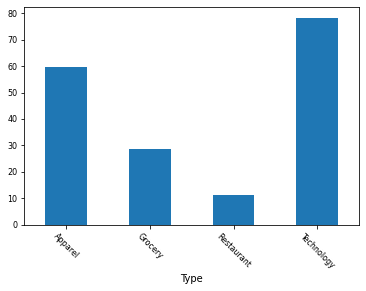

In [ ]:
# plot the average transaction price 
def plot_demo():
    p = Util.path_for_data("data.csv")
    df = pd.read_csv(p, skiprows = 1, delimiter=';')
    pt = df.groupby(['Type']).mean()
    chart = pt['Price'].plot(kind='bar', 
                             fontsize = 8, rot=-45)
    chart.get_figure().savefig('price.png')

plot_demo()

In [ ]:
# run to read the next section
ide.reader.view_section(36)